### Objective
- Analyzing sensor data for trend
- Adding commentary 

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from utils.plot import plot_sensors_for_unit_ts
from utils.trend import get_macd_signal_line, get_signal_macd_crossover, plot_macd_up_down

In [3]:
fd001_unit1 = pd.read_csv('data/FD001_unit1.csv')

In [4]:
col_names = fd001_unit1.columns
col_names

Index(['unit', 'time_cycles', 'op_setting_1', 'op_setting_2', 'op_setting_3',
       'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6',
       'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10', 'sensor_11',
       'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16',
       'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21',
       'dataset'],
      dtype='object')

In [5]:
OP_SETTING_COLUMNS = ['op_setting_1', 'op_setting_2', 'op_setting_3']

In [6]:
SENSOR_COLUMNS = ['sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6',
       'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10', 'sensor_11',
       'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16',
       'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21']

### Select one unit and Fleet engine

In [8]:
unit_df = fd001_unit1

In [10]:
unit_sensor_df = unit_df[['sensor_2']]
unit_sensor_df.columns = ["sensor"]
unit_sensor_df

,sensor
0,641.82
1,642.15
2,642.35
3,642.35
4,642.37
...,...
187,643.75
188,644.18
189,643.64
190,643.34


<Axes: >

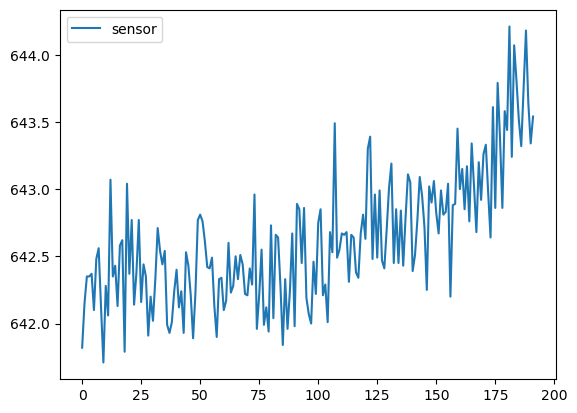

In [12]:
unit_sensor_df.plot()

### Analyzing trend for sensor data

In [13]:
macd_data = get_macd_signal_line(unit_sensor_df)
macd_data

,sensor,SMA,LMA,MACD,signal_line
0,641.82,NaN,NaN,NaN,NaN
1,642.15,NaN,NaN,NaN,NaN
2,642.35,NaN,NaN,NaN,NaN
3,642.35,NaN,NaN,NaN,NaN
4,642.37,642.208,NaN,NaN,NaN
...,...,...,...,...,...
187,643.75,643.690,643.3870,0.3030,0.275958
188,644.18,643.712,643.4360,0.2760,0.291833
189,643.64,643.680,643.4720,0.2080,0.297292
190,643.34,643.646,643.4760,0.1700,0.295792


In [14]:
signals = get_signal_macd_crossover(macd_data)
signals

,sensor,up_down
0,641.82,NaN
1,642.15,0.0
2,642.35,0.0
3,642.35,0.0
4,642.37,0.0
...,...,...
187,643.75,0.0
188,644.18,0.0
189,643.64,0.0
190,643.34,0.0


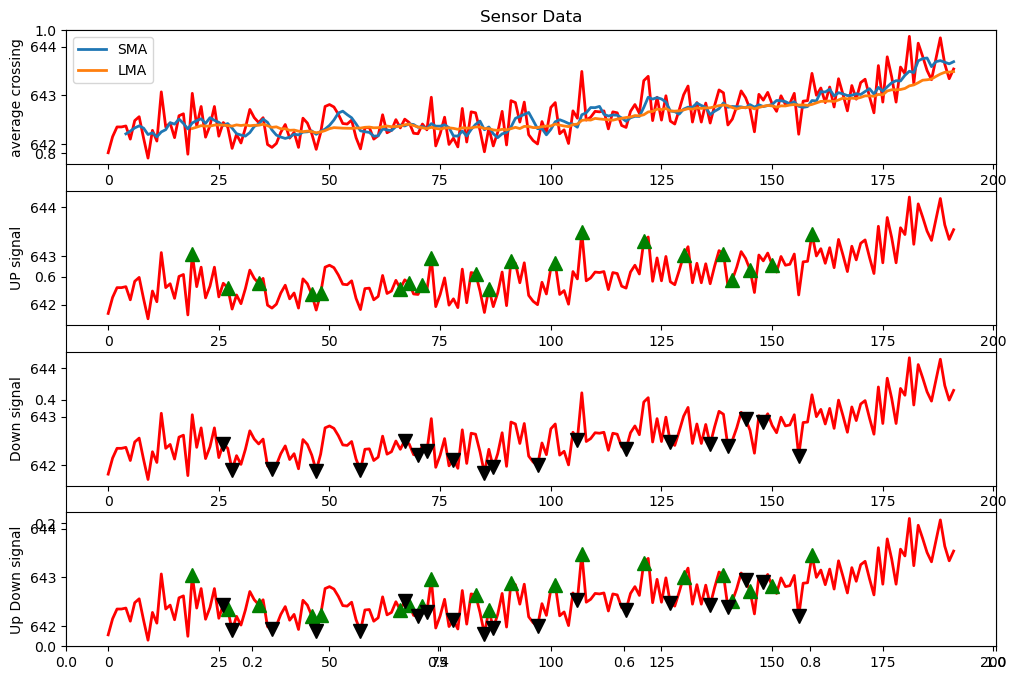

In [16]:
plot_macd_up_down(macd_data, signals)

In [22]:
signals.up_down

0      NaN
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
187    0.0
188    0.0
189    0.0
190    0.0
191    0.0
Name: up_down, Length: 192, dtype: float64

In [32]:
descriptions = []
for x in signals.up_down:
#     print(x)
    if x is 'NaN':
        x = 0.0
    if x == 1.0:
        description = 'the sensor data is having upward trend'
#         descriptions.append(description)
    elif x == -1.0:
        description = 'the sensor data is having downward trend'
#         descriptions.append(description)
    else:
        description = 'there is a normal trend in sensor data'
    descriptions.append(description)
    
print(descriptions)
        
    

['there is a normal trend in sensor data', 'there is a normal trend in sensor data', 'there is a normal trend in sensor data', 'there is a normal trend in sensor data', 'there is a normal trend in sensor data', 'there is a normal trend in sensor data', 'there is a normal trend in sensor data', 'there is a normal trend in sensor data', 'there is a normal trend in sensor data', 'there is a normal trend in sensor data', 'there is a normal trend in sensor data', 'there is a normal trend in sensor data', 'there is a normal trend in sensor data', 'there is a normal trend in sensor data', 'there is a normal trend in sensor data', 'there is a normal trend in sensor data', 'there is a normal trend in sensor data', 'there is a normal trend in sensor data', 'there is a normal trend in sensor data', 'the sensor data is having upward trend', 'there is a normal trend in sensor data', 'there is a normal trend in sensor data', 'there is a normal trend in sensor data', 'there is a normal trend in senso

In [33]:
signals['description'] = descriptions

In [34]:
signals

,sensor,up_down,description
0,641.82,NaN,there is a normal trend in sensor data
1,642.15,0.0,there is a normal trend in sensor data
2,642.35,0.0,there is a normal trend in sensor data
3,642.35,0.0,there is a normal trend in sensor data
4,642.37,0.0,there is a normal trend in sensor data
...,...,...,...
187,643.75,0.0,there is a normal trend in sensor data
188,644.18,0.0,there is a normal trend in sensor data
189,643.64,0.0,there is a normal trend in sensor data
190,643.34,0.0,there is a normal trend in sensor data


### Start adding GenAI part for commentaory

### to be updated by Mani